In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/Users/uu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x_train = pd.read_csv("/Users/uu/Documents/Projects/FashionMNIST/data1/fashion-mnist_train.csv")
x_test = pd.read_csv("/Users/uu/Documents/Projects/FashionMNIST/data1/fashion-mnist_test.csv")

y_train = x_train.pop('label')
y_test = x_test.pop('label')

x_train = np.array(x_train).reshape(-1, 28, 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28) / 255.0

In [3]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

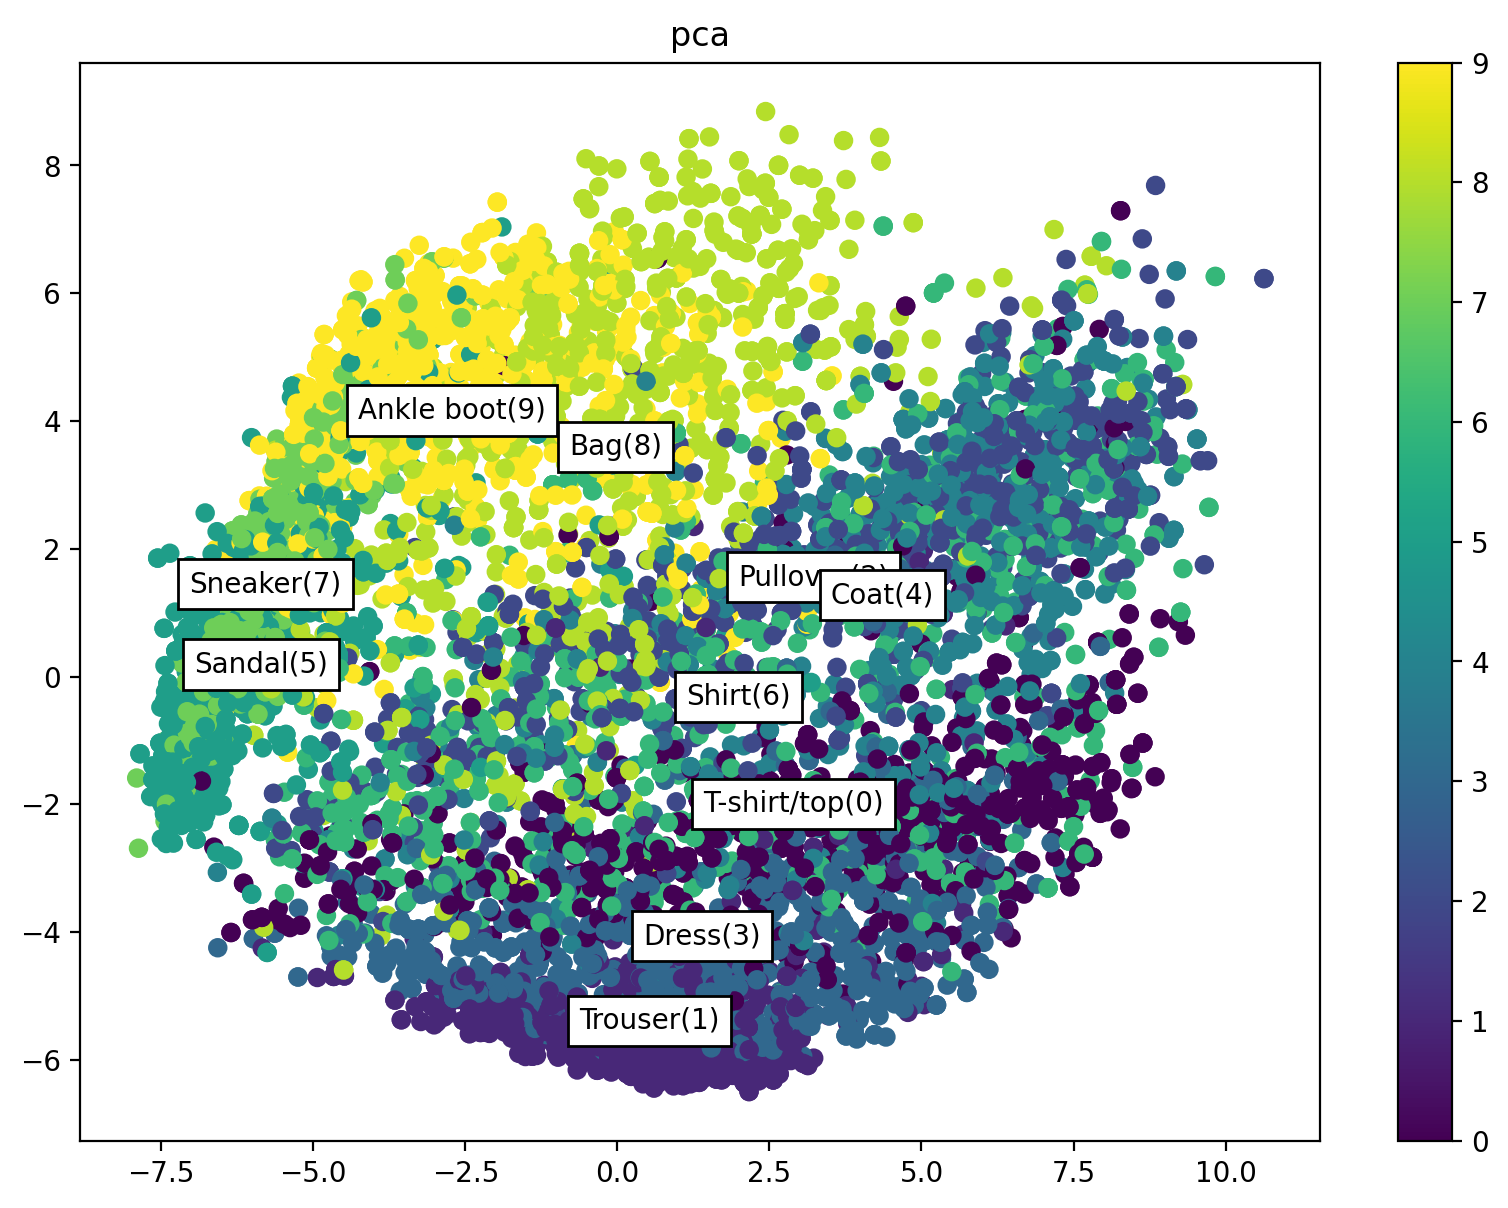

/Users/uu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


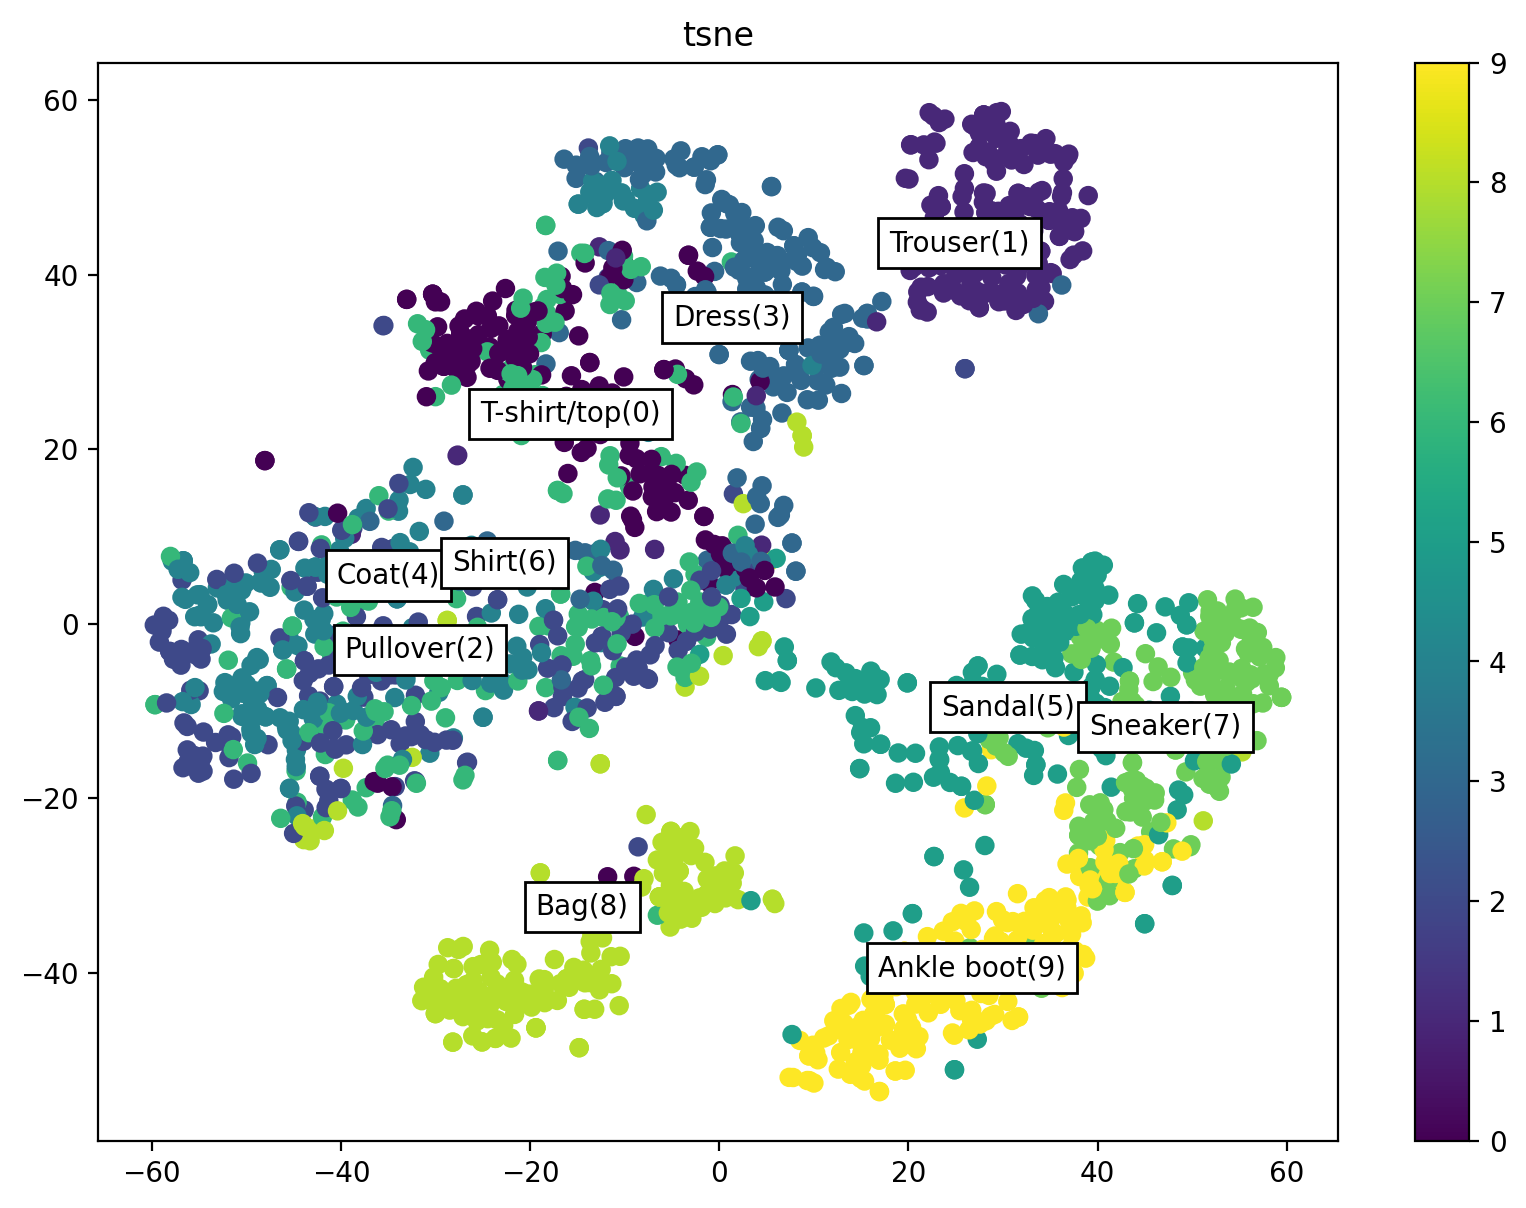

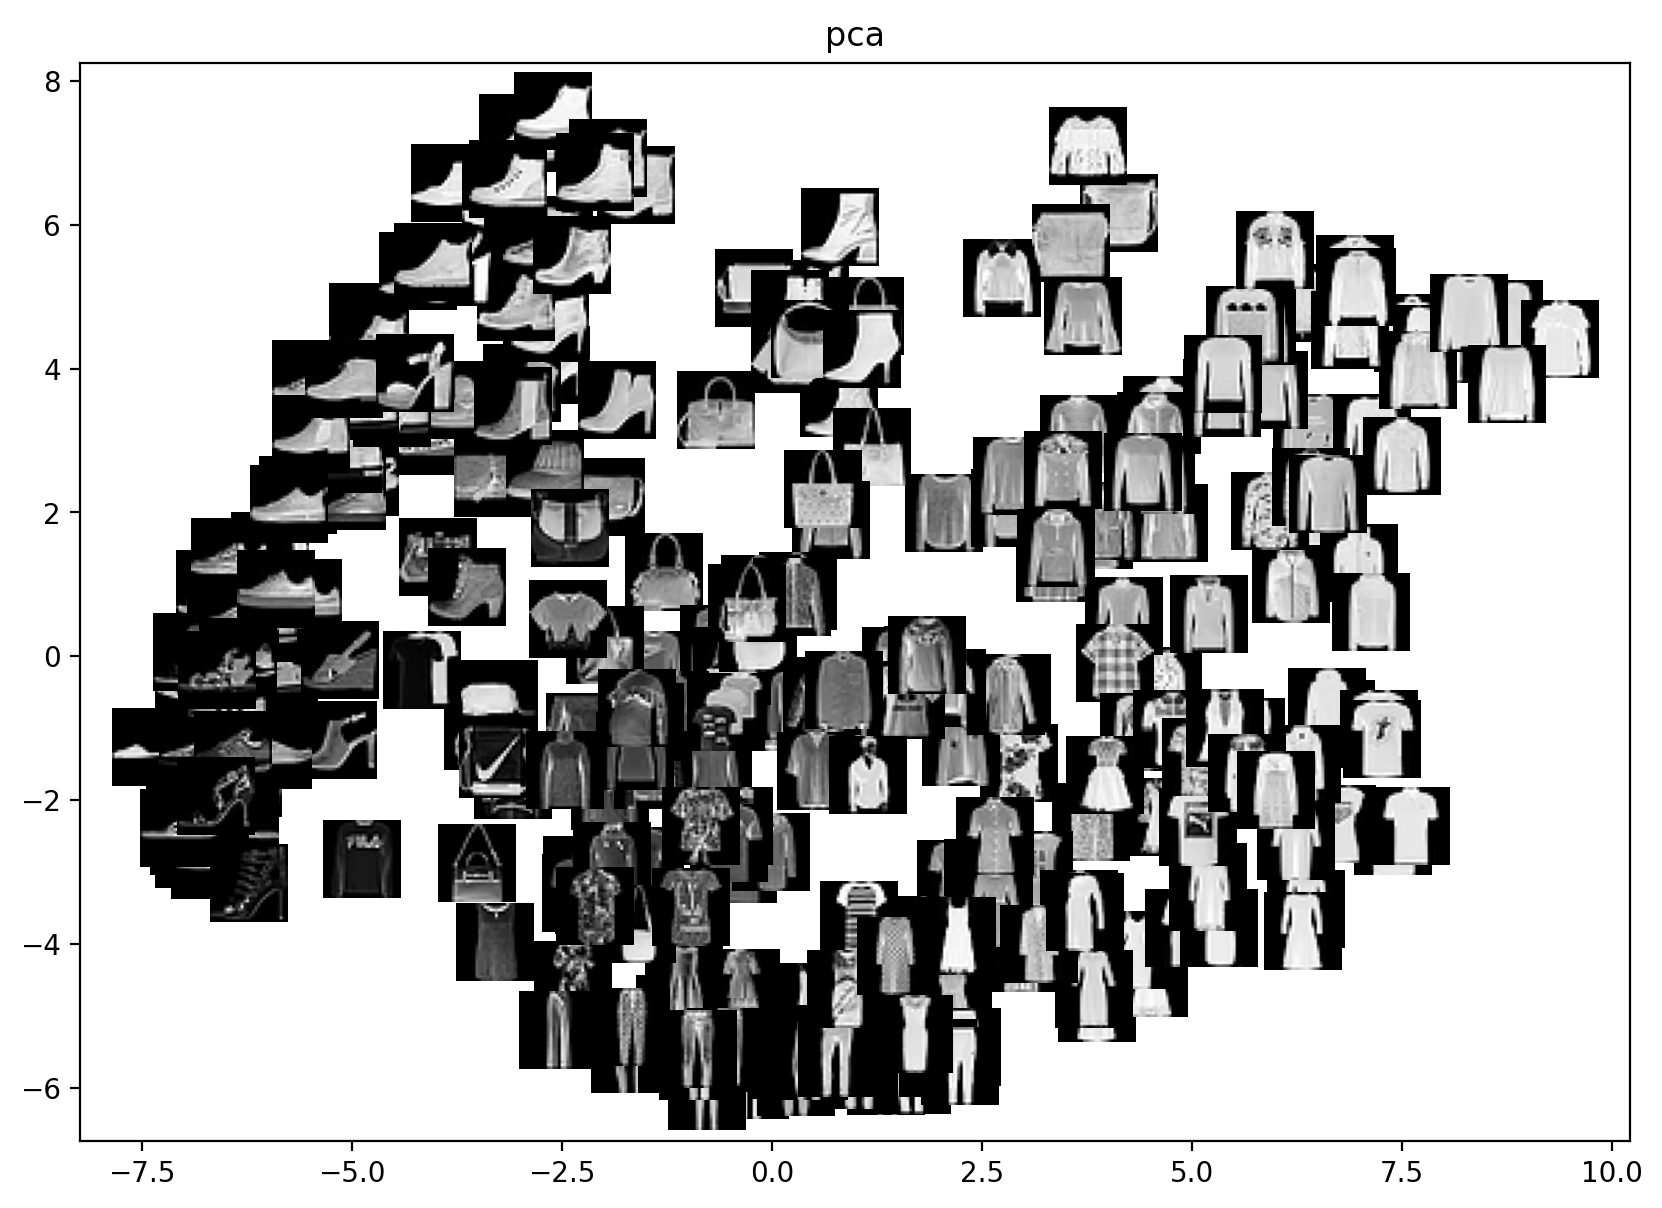

/Users/uu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


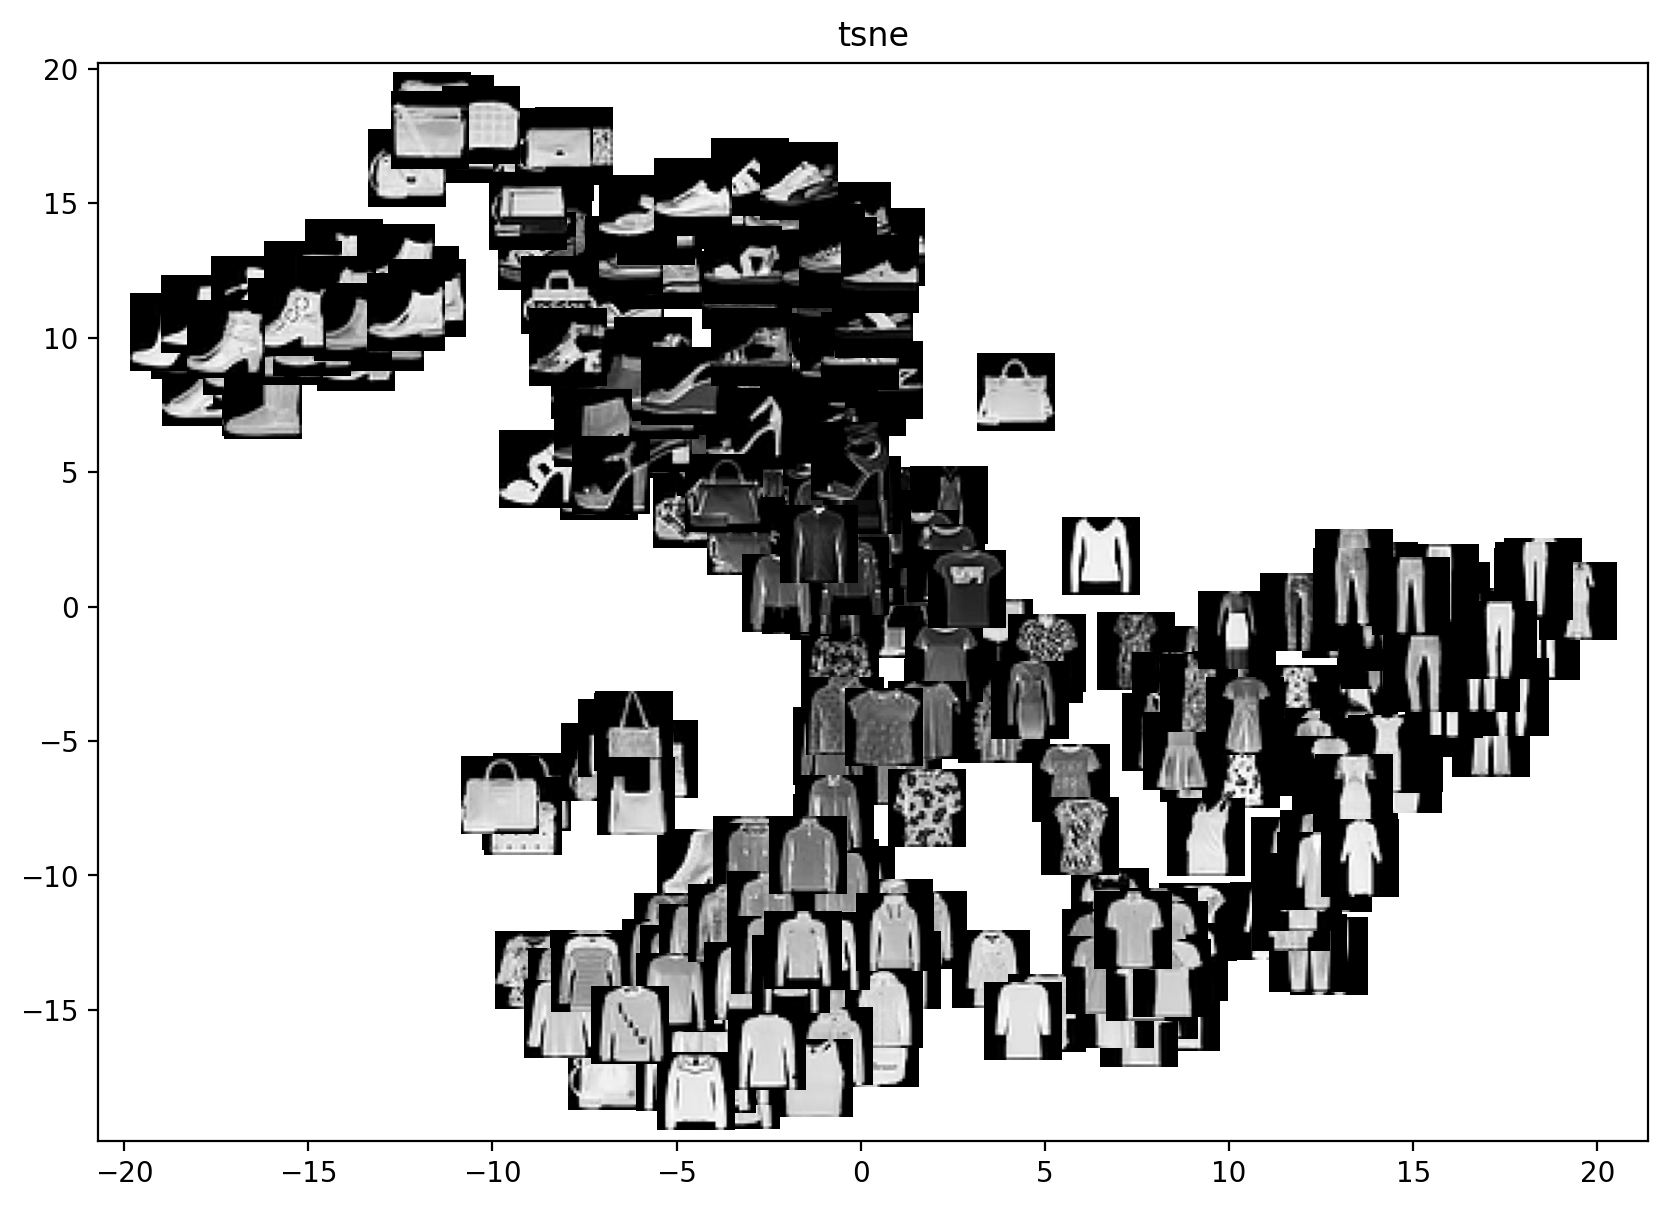

In [4]:
def plot_latent(mode, count, technique):
    idx = np.random.choice(len(x_test), count)
    inputs = x_test[idx]
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.set_title(technique)
    if technique == 'pca':
        coords = PCA(n_components = 2).fit_transform(inputs.reshape(count, -1))
    else:
        coords = TSNE(n_components = 2).fit_transform(inputs.reshape(count, -1))
        
    if mode == 'imgs':
        for image, (x,y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28,28), zoom = 1, cmap = 'gray')
            ab = AnnotationBbox(im, (x, y), xycoords = 'data', frameon = False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
        
    elif mode == 'dots':
        classes = y_test[idx]
        plt.scatter(coords[:, 0], coords[:, 1], c = classes)
        plt.colorbar()
        for i in range(10):
            class_center = np.mean(coords[classes == i], axis = 0)
            text = TextArea('{}({})'.format(labeldict[i], i))
            ab = AnnotationBbox(text, class_center, xycoords = 'data', frameon = True)
            ax.add_artist(ab)
    plt.show()
        
#plot_latent('dots', 10000, 'autoencoder')
plot_latent('dots', 10000, 'pca')
plot_latent('dots', 2000, 'tsne')

#plot_latent('imgs', 300, 'autoencoder')
plot_latent('imgs', 300, 'pca')
plot_latent('imgs', 300, 'tsne')